fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Feature ranking:
1. feature 10 (0.14738376673971892)
2. feature 9 (0.10975140028898271)
3. feature 1 (0.10382698137061264)
4. feature 6 (0.10118538971545969)
5. feature 7 (0.094504611773772)
6. feature 4 (0.07996471262092321)
7. feature 0 (0.07696514204984091)
8. feature 8 (0.07572829676348763)
9. feature 2 (0.07433604528932687)
10. feature 3 (0.0698413077237245)
11. feature 5 (0.06651234566415103)
Accuracy: 0.8625
ROC AUC: 0.7432779985971475


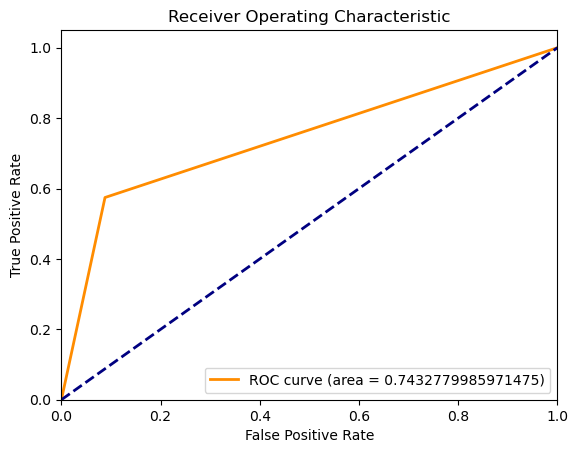

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best ROC AUC score: 0.8275969062313736


In [2]:
#REDWINEQUALITYPREDICTION


# Import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# 1st Load dataset
url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Red%20Wine/winequality-red.csv?raw=true'
data = pd.read_csv(url)

# Display rows of dataset
data.head()

# Check missing values
print(data.isnull().sum())

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('quality', axis=1))

# Create a new DataFrame 
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['quality'] = data['quality']

# Define features and the target
X = scaled_data.drop('quality', axis=1)
y = scaled_data['quality']

# Train model
rf = RandomForestClassifier()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")

# Select top features 
top_features = indices[:5]
X_top = X.iloc[:, top_features]

# Set an arbitrary cutoff for the quality variable
y_binary = (y >= 7).astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_top, y_binary, test_size=0.2, random_state=42)

# Train model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Make predictions
y_pred = dt.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='roc_auc')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best ROC AUC score: {best_score}")
